---
**Desafio Bonzinho ou 1: Aumentar a query da amostra menor para alunos menor de idade <br>
Desafio 2 - Ver mega desafio<br>
Desafio 3: Criar Função para plotar o boxplot do seaborn<br>
Desafio 4: Verificar se quem zerou foi eliminado ou não estava presente. <br>
Desafio 5: Quem é eliminado tira zero ou NaN? <br>
Desafio 6: Proporção de treineiros por renda <br>
Desafio 7: Fazer o mesmo boxplot olhando para a questão 25 (tem internet ou não?)<br>
Desafio Extra: Procurar quem faz a prova em estados diferentes do de residência. <br>
Desafio Extra 2: Quem falta à prova tem carro ou não? <br>
Mega Desafio: Pegar a amostra completa de 13 e 14 anos e comparar por estado <br>**

---

In [42]:
import pandas as pd
import matplotlib as mpl
mpl.style.use(['seaborn'])

dados = pd.read_csv("https://github.com/alura-cursos/imersao-dados-2-2020/blob/master/MICRODADOS_ENEM_2019_SAMPLE_43278.csv?raw=true")

# Tabela Geral

In [14]:
dados.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,...,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,NU_NOTA_TOTAL
0,190001004661,2019,1506138,Redenção,15,PA,17,M,1,3,1,1506138.0,Redenção,15.0,PA,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,99999CCCABBCAADDBCEBCCADBEEBDECBAABDEACACAEABB...,DEEDCAECDDEEECBCBECABEBAECBBCDAECAEBBBBBDCCDB,1,DEADBAAAEBEECEBCBCBCBDADAEABCEDDDDADCBEECACBC,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,AADDDBEEEBEDDBEBACABCDBABECECACAECDCBDCCEDCDA,1.0,60.0,100.0,80.0,80.0,100.0,420.0,B,B,A,A,4,B,A,C,B,A,C,B,A,A,A,A,A,A,A,B,A,C,A,B,B,2288.9
1,190001004674,2019,1504208,Marabá,15,PA,23,M,1,3,1,1504208.0,Marabá,15.0,PA,1,3,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,99999ABCEBCEDDECEEEBBCCEECCABDABEEBCDEAEBBEAEA...,NaN,1,NaN,CBABADBBCEEEBCBADCBEEDBBEADBBACDBBACCCCADACAC,BBEDABDACACBABAECBBCCADCEBDBBCDDEEAAADDBECDECA...,NaN,1.0,80.0,100.0,80.0,80.0,60.0,400.0,C,C,A,A,4,B,A,B,C,A,A,B,B,B,A,A,A,A,B,A,A,B,A,A,B,1184.6
2,190001004722,2019,1501402,Belém,15,PA,35,F,2,1,1,1501402.0,Belém,15.0,PA,1,12,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,99999ECBCECEBBABECCCECECCEECCDECEEEDADDDDECEDD...,DDBEADEBBCADCEEACABECBCEBADECADCEDAACBDABABCE,1,AAECACDEADCBCDDDBCBDADAEABCEBABEEBCBEECEBDADC,CBABADBBCEEEBCBADCBEEDBBEADBBACDBBACCCCADACAC,BBEDABDACACBABAECBBCCADCEBDBBCDDEEAAADDBECDECA...,EEEADBEBACABCDBABECECACDCBDCCEDCDABEDECDDDBAA,1.0,100.0,120.0,120.0,100.0,120.0,560.0,C,A,B,B,5,C,A,B,C,A,A,B,A,B,A,A,A,A,B,A,B,B,A,A,B,2350.5
3,190001004735,2019,1507300,São Félix do Xingu,15,PA,23,F,1,3,1,1505437.0,Ourilândia do Norte,15.0,PA,1,7,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,99999BABCDABBCBDDAAECADBDDADDCBCEEDCAEBCEAEABD...,CBDEBBCBDEBCABCDBDEDADCCBEDBCAECEBEBDEBAEECBC,1,BEEAAEBEEBADEADDADAEABCEDDDBCBCBCCACBCDADCCEB,EEBCEEDBADBBCBABCCADCEBACDBBACCACACBEADBBADCB,ADBBEDCABAABBCBCDAAECDDDBAAAECADECDCEBDEEAECBD...,BEDEEEAADBEBACABCDBABECECACADCBDCCEDCDABECDDD,1.0,100.0,120.0,120.0,120.0,40.0,500.0,E,C,A,A,1,B,A,B,C,A,A,B,A,A,A,A,A,A,B,A,A,B,A,A,B,2555.7
4,190001004776,2019,1500800,Ananindeua,15,PA,16,F,1,3,1,1500800.0,Ananindeua,15.0,PA,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,EBCAB99999BBCECBCACBEACBDAABDBCBBDACEBBACDCAEC...,AECCBBCBBCBDEDECACBAABEDABBEDDADCEADDBEBDBBEB,0,DEADBAAAEBEECEBCBCBCBDADAEABCEDDDDADCBEECACBC,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,AADDDBEEEBEDDBEBACABCDBABECECACAECDCBDCCEDCDA,1.0,160.0,140.0,160.0,160.0,160.0,780.0,E,E,B,D,3,E,A,B,C,B,A,B,A,A,A,A,A,A,B,A,A,D,A,A,B,2803.5


In [15]:
dados.shape

(127380, 137)

**Títulos das colunas**

In [16]:
dados.columns.values

array(['NU_INSCRICAO', 'NU_ANO', 'CO_MUNICIPIO_RESIDENCIA',
       'NO_MUNICIPIO_RESIDENCIA', 'CO_UF_RESIDENCIA', 'SG_UF_RESIDENCIA',
       'NU_IDADE', 'TP_SEXO', 'TP_ESTADO_CIVIL', 'TP_COR_RACA',
       'TP_NACIONALIDADE', 'CO_MUNICIPIO_NASCIMENTO',
       'NO_MUNICIPIO_NASCIMENTO', 'CO_UF_NASCIMENTO', 'SG_UF_NASCIMENTO',
       'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO',
       'IN_TREINEIRO', 'CO_ESCOLA', 'CO_MUNICIPIO_ESC',
       'NO_MUNICIPIO_ESC', 'CO_UF_ESC', 'SG_UF_ESC',
       'TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC',
       'IN_BAIXA_VISAO', 'IN_CEGUEIRA', 'IN_SURDEZ',
       'IN_DEFICIENCIA_AUDITIVA', 'IN_SURDO_CEGUEIRA',
       'IN_DEFICIENCIA_FISICA', 'IN_DEFICIENCIA_MENTAL',
       'IN_DEFICIT_ATENCAO', 'IN_DISLEXIA', 'IN_DISCALCULIA',
       'IN_AUTISMO', 'IN_VISAO_MONOCULAR', 'IN_OUTRA_DEF', 'IN_GESTANTE',
       'IN_LACTANTE', 'IN_IDOSO', 'IN_ESTUDA_CLASSE_HOSPITALAR',
       'IN_SEM_RECURSO', 'IN_BRAILLE', 'IN_AMPLIADA_24

# **Desafio 1 (Bonzinho) - Plotar o gráfico Alunos Menores de Idade**

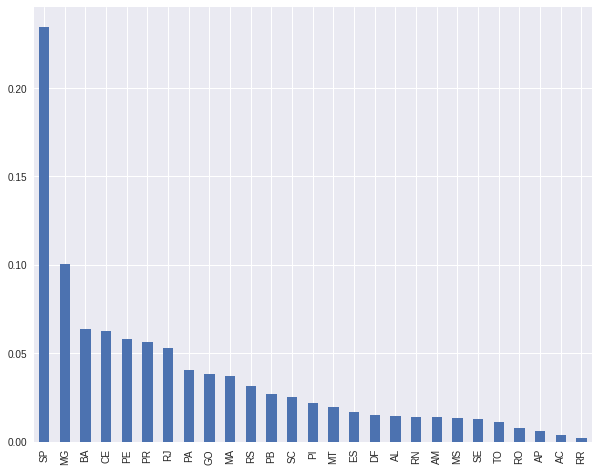

In [44]:
alunos_menor_idade = dados.query("NU_IDADE <= 17")
alunos_menor_idade["SG_UF_RESIDENCIA"].value_counts(normalize=True).plot.bar(figsize=(10,8))

23-24% dos alunos menores de idade que prestam a prova são do estado de São Paulo. Coincide com São Paulo representar 21% da população do país, uma proporção pouco maior que 1:1. Analisando os outros estados esta proporção permanace.

# **Desafio 2 - Ver Mega Desafio no final da página**

# **Desafio 3 - Função que plot o boxplot do Seaborn**

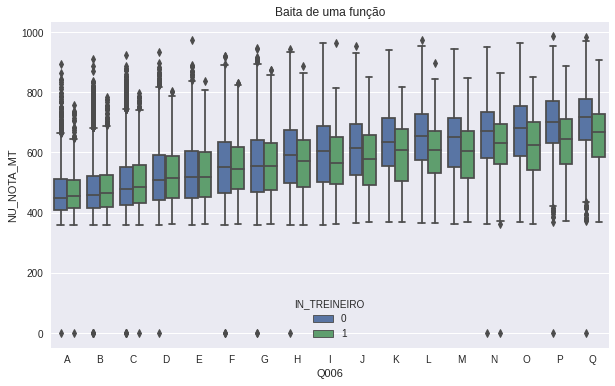

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

renda_ordenada = dados["Q006"].unique()
renda_ordenada.sort()

def grafar(titulo, linhas, colunas, df, **kwargs):
  plt.figure(figsize=(10, 6))
  plt.title(titulo)
  sns.boxplot(x = linhas, y = colunas, data = df, **kwargs)
  

grafar("Baita de uma função", "Q006", "NU_NOTA_MT", dados, hue = "IN_TREINEIRO", order = renda_ordenada)

Aproveitei para chamar uma comparação entre treineiros e não treineiros. Me parece que sendo a diferença entre ambos menor nas classes mais baixas - e os não treineiros se saindo melhor conforme a renda aumenta - as pessoas de maior renda façam o treineiro com menos estudo do que as de menor. Não levam a prova tão a sério por não lhes valer muito. Já os de baixa renda realmente encaram como um treino sério para quando for a sua chance de entrar em uma boa universidade.

# **Desafio 4 - Quem zerou foi eliminado ou não estava presente?**

In [47]:
provas = ["NU_NOTA_CN", "NU_NOTA_CH", "NU_NOTA_MT", "NU_NOTA_LC", "NU_NOTA_REDACAO"]
dados[provas].sum()
dados["NU_NOTA_TOTAL"] = dados[provas].sum(axis = 1)

presenca_provas = ['TP_PRESENCA_MT', 'TP_PRESENCA_LC']
dados.query("NU_NOTA_TOTAL == 0")[presenca_provas].value_counts(normalize=True)*100

TP_PRESENCA_MT  TP_PRESENCA_LC
0               0                 99.437624
                2                  0.411494
                1                  0.133736
1               0                  0.010287
                1                  0.006858
dtype: float64

99.4% das pessoas que zeraram foi por não estar presente.

# **Desafio 5 - Quem é eliminado tira zero ou NaN?**

- 0 Faltou <br>
- 2 Eliminado

In [20]:
dados.query("TP_PRESENCA_MT == 2")["NU_NOTA_MT"].head(1)

1784   NaN
Name: NU_NOTA_MT, dtype: float64

In [21]:
dados.query("TP_PRESENCA_MT == 0")["NU_NOTA_MT"].head(1)

1   NaN
Name: NU_NOTA_MT, dtype: float64

Os eliminados são guardados como NaN, assim como os que faltaram.



# **Desafio 6 - Proporção de treineiros por renda**

B    19.654568
C    16.667749
E     8.226739
D     7.785209
G     6.863191
H     6.265827
F     5.551588
I     4.629570
A     3.869879
Q     3.376404
J     3.058243
N     2.830985
O     2.525810
P     2.467372
K     2.220635
M     2.012856
L     1.993377
Name: Q006, dtype: float64

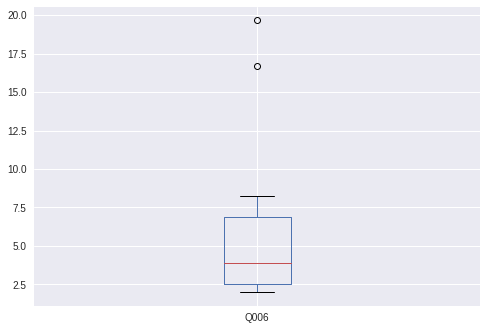

In [45]:
prop = dados.query("IN_TREINEIRO == 1")["Q006"].value_counts(normalize=True)*100
prop.plot.box()
prop

Na distribuição de treineiros por renda temos uma distribuição interessante. Sendo A o mais pobre e Q o mais rico, B e C são outliers acima do máximo, com 19.6 e 16.6% respectivamente. Nota-se que apesar da pouca diferença entre os que estão do meio paro o fim da tabela, os mais pobres estão lado a lado com os mais ricos. Minha opnião é que enquanto um não tem tempo de prestar a prova como treineiro, outro não tem vontade.

# **Desafio 7 - Fazer o boxplot olhando para a questão 25 (tem internet ou não?)**

[Text(0, 0, 'Sim'), Text(0, 0, 'Não')]

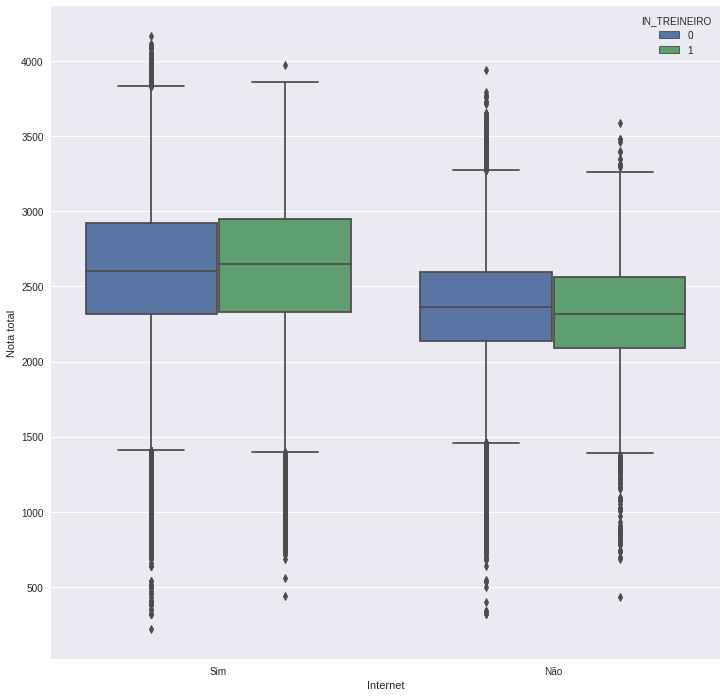

In [48]:
dados_sem_notas_zero = dados.query("NU_NOTA_TOTAL != 0")
dados_sem_notas_zero.head()

plt.figure(figsize=(12, 12))
graph = sns.boxplot(x="Q025", y = "NU_NOTA_TOTAL", data = dados_sem_notas_zero, hue = "IN_TREINEIRO")
plt.ylabel("Nota total")
plt.xlabel("Internet")
graph.set_xticklabels(["Sim", "Não"])

Nota-se uma melhora naqueles que tem internet em casa contra os que não tem.

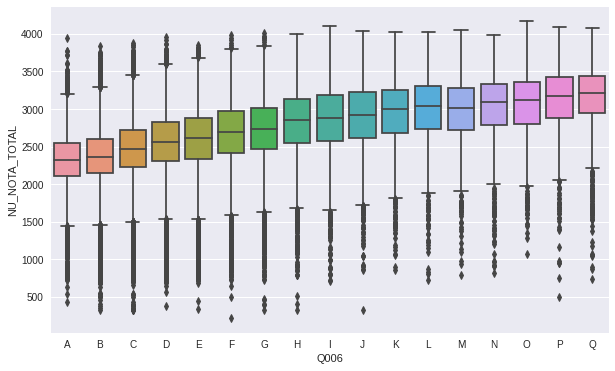

In [49]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="Q006", y="NU_NOTA_TOTAL", data = dados_sem_notas_zero, order = renda_ordenada)

Na amostra a diferença entre a nota e renda é maior do que a diferença com e sem internet. Assumindo que as pessoas de maior rende tem acesso e as de menor não, nota-se que a internet, para o ENEM, ainda não é bem utilizada como meio de estudo para as classes mais altas. Uma provavel causa é a falta de necessidade por conteúdo gratuito. Pagar por um curso presencial de renome lhes parece mais interessante do que filtrar o conteúdo gratuito por algo de valor.

# **Desafio Extra 1 - Procurar quem faz a prova em estados diferentes do de residência**

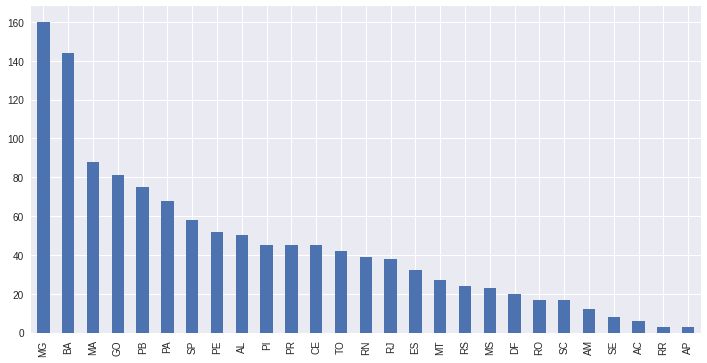

In [50]:
uf = dados.query("SG_UF_RESIDENCIA != SG_UF_PROVA")["SG_UF_RESIDENCIA"].value_counts()
uf.plot.bar(figsize = (12, 6))

MG e BA lideram com sobra o número de participantes que fizeram a prova fora de seus estados.

Text(0.5, 1.0, 'Participantes que Prestaram a Prova Fora de Seu Município de Residência')

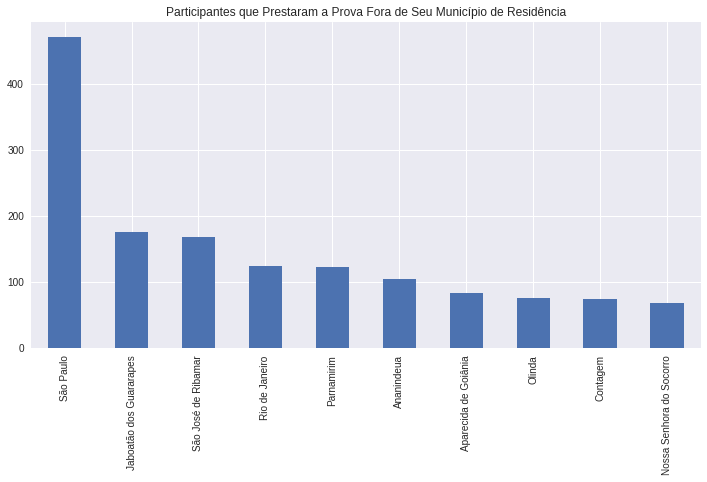

In [51]:
cidade = dados.query("NO_MUNICIPIO_RESIDENCIA != NO_MUNICIPIO_PROVA")["NO_MUNICIPIO_RESIDENCIA"].value_counts().head(10)
cidade.plot.bar(figsize = (12, 6)).set_title("Participantes que Prestaram a Prova Fora de Seu Município de Residência")


A mesma análise, porem focando nas 10 cidades com maior número de pessoas que prestam a prova fora. Todas essas cidades são grandes regiões metropolitanas com várias cidades juntas uma à outra. Nesses locais fazer a prova em outra cidade pode realmente significar 10 minutos de caminhada. São Paulo se destaca pela megalópole que é.

# **Desafio Extra 2 - Quem falta à prova tem carro ou não?**

Para isso escolhi uma prova de cada dia em que o ENEM é aplicado e busquei apenas os que faltaram nessas provas. Avaliei quem faltou em uma delas ou em ambas.

A    64.821712
B    29.746879
C     4.521001
D     0.744879
E     0.165529
Name: Q010, dtype: float64

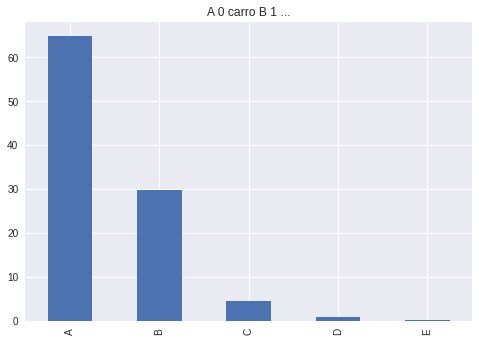

In [59]:
faltou_dois_dias = dados.query("TP_PRESENCA_MT == 0 and TP_PRESENCA_LC == 0")["Q010"].value_counts(normalize=True)*100
faltou_dois_dias.plot.bar().set_title("A 0 carro B 1 ...")
faltou_dois_dias

Sendo o número de faltas sem carro o dobro de faltas com carro, conclui-se que o meio de transporte é um fator decisivo para comparecer a prova. Uma análise mais aprofundada iria mostrar que a renda está diretamente ligada a essa proporção.

# **MEGA DESAFIO - Pegar a amostra completa de 13 e 14 anos e comparar por estado**

Utilizei os dados filtrados do Leandro Dias para terminar esse desafio. https://github.com/leandrosdias

In [56]:
df = pd.read_csv("https://raw.githubusercontent.com/leandrosdias/imersao_dados_csv_filter/main/docs/Aula02_megadesafio.csv")
df.shape

(5596, 136)

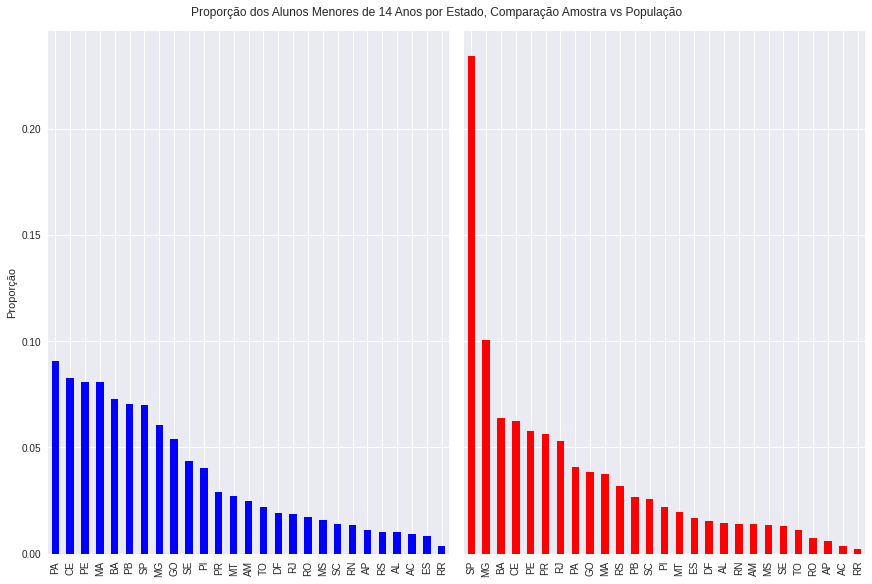

In [57]:
fig, axes = plt.subplots(1, 2, figsize=(12,8), sharey = True, constrained_layout = True)
fig.suptitle("Proporção dos Alunos Menores de 14 Anos por Estado, Comparação Amostra vs População")
df["SG_UF_RESIDENCIA"].value_counts(normalize=True).plot.bar(ax = axes[0], ylabel = "Proporção", label = "Inglês", color = "blue")
alunos_menor_idade["SG_UF_RESIDENCIA"].value_counts(normalize=True).plot.bar(ax = axes[1], label = "Espanhol", color = "red")

Esses dados mostram que nossa amostra não condiz com a população nesse quesito. A análise da população é mais condizente com o que se espera, com os estados mais populosos do país sendo os com mais participantes dentro da idade indicada.